In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import pytpc

import sys
sys.path.insert(0, '../modules/')
import dataDiscretization as dd

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Real Data

In [ ]:
data_path = '../data/real/'
filename = 'run_0130.h5'
file = pytpc.HDFDataFile(data_path + filename, 'r')

In [ ]:
labels = pd.read_csv(data_path+'run_0130_labels.csv', sep=',')
p_indices = labels.loc[(labels['label'] == 'p')]['evt_id'].index[:]

print(p_indices)

In [ ]:
i = 0

In [ ]:
#i += 1

real_evt = file[p_indices[i]]

real_xyzs = real_evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=True, baseline_correction=True, cg_times=True)

plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(real_xyzs[:,2], real_xyzs[:,1],'.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/real-test_128_smallpts.png')

# Simulated Data 

In [ ]:
hdfpath = '../data/tilt/p_40000_tilt.h5'
simfile = pytpc.HDFDataFile(hdfpath, 'r')

In [ ]:
i = 0

In [ ]:
#i += 1

sim_evt = simfile[i]

sim_xyzs = sim_evt.xyzs(peaks_only=True, drift_vel=5.2, clock=12.5, return_pads=False, baseline_correction=True, cg_times=True)

plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(sim_xyzs[:,2], sim_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')

In [ ]:
simnoise_xyzs = dd.addNoise(sim_xyzs)
print(sim_xyzs.shape)
print(simnoise_xyzs.shape)

In [ ]:
plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(simnoise_xyzs[:,2], simnoise_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(sim_xyzs[:,2], sim_xyzs[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/sim-test.png')

# Simulated Pure Noise Events

In [ ]:
empty_evt = np.empty([1,4])
junk_evt = dd.addNoise(empty_evt)

In [ ]:
print(noise_evt.shape)

In [ ]:
plt.figure(figsize=(1.28, 1.28), dpi=100)

plt.plot(junk_evt[:,2], junk_evt[:,1], '.', markersize=2.0, c='black')
plt.xlim(0.0, 1250.0)
plt.ylim((-275.0, 275.0))

plt.axis('off')

#plt.savefig('../cnn-plots/test/simnoise-test.png')

# Small portion of plot for use in thesis

In [50]:
from PIL import Image as pil_image
from keras.preprocessing.image import img_to_array, array_to_img, load_img
import seaborn as sns

In [39]:
img_path = '../plots/results/thesis/'
file_path = 'small-img-CNN.png'

In [40]:
img = load_img(img_path + file_path, grayscale=True)#, target_size=(28,28))
#img.show()

In [109]:
img_array = img_to_array(img)
img_array = np.reshape(img_array, (img_array.shape[0], img_array.shape[1]))
img_array = img_array.astype(int)
np.savetxt("../plots/results/thesis/small-img-CNN.csv", img_array, delimiter=",")
print(img_array.shape)

(25, 25)


In [88]:
df = pd.DataFrame(img_array)

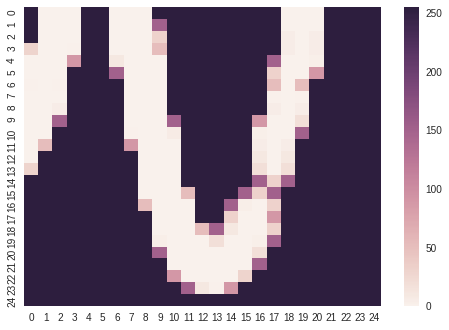

In [89]:
sns.heatmap(df)

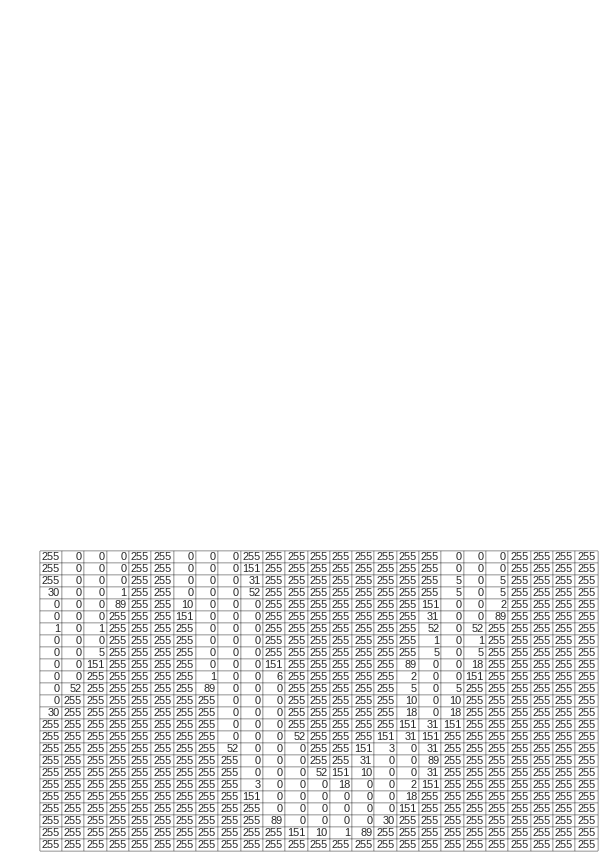

In [107]:
fig, axs = plt.subplots(1,1, figsize=(10, 10))
axs.axis('tight')
axs.axis('off')

the_table = plt.table(cellText=img_array, fontsize=20)
table = axs.add_table(the_table)

table.set_fontsize(20)